In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm_notebook
print(os.listdir("../input"))


['master.csv']


In [2]:
df = pd.read_csv('../input/master.csv')

In [3]:
df.tail(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27810,Uzbekistan,2014,female,15-24 years,347,2992817,11.59,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27811,Uzbekistan,2014,male,55-74 years,144,1271111,11.33,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27813,Uzbekistan,2014,male,75+ years,17,224995,7.56,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27814,Uzbekistan,2014,female,25-34 years,162,2735238,5.92,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
CONTINUOUS = ['suicides/100k pop','HDI for year','gdp_per_capita ($)']
CATEGORICALS = []
TO_DELETE = []

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


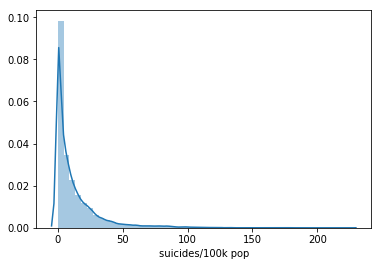

In [7]:
plt.figure()
sns.distplot(df['suicides/100k pop'])
plt.show()

In [8]:
low = np.quantile(df['suicides/100k pop'], .01)
high = np.quantile(df['suicides/100k pop'], .99)
print(low, high)

df['suicides/100k pop'] = df['suicides/100k pop'].apply(lambda x: x if x <= high and x >= low else np.NaN)
print(df.shape)
df.dropna(subset=['suicides/100k pop'], inplace=True)
print(df.shape)

0.0 91.57100000000013
(27820, 12)
(27541, 12)


Country number of unique values: 101


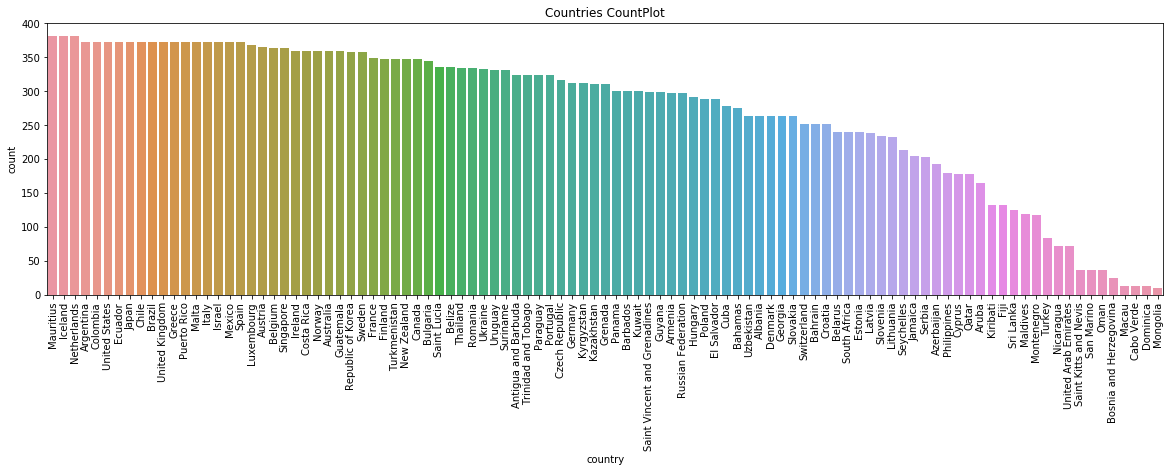

In [9]:
print(f"Country number of unique values: {df['country'].nunique()}")

plt.figure(figsize=(20, 5))
sns.countplot(df['country'], order=df['country'].value_counts().index)
plt.title("Countries CountPlot")
plt.xticks(rotation=90)
plt.show()

In [10]:
print("Top 30 suicides countries")
top_suicides_countries = list(df.groupby(['country']).mean()['suicides/100k pop'].sort_values(ascending=False)[:30].index)
print(top_suicides_countries)

print("Bottom 30 sucides countries")
bottom_suicides_countries = list(df.groupby(['country']).mean()['suicides/100k pop'].sort_values(ascending=True)[:30].index)
print(bottom_suicides_countries)

Top 30 suicides countries
['Sri Lanka', 'Lithuania', 'Kazakhstan', 'Russian Federation', 'Belarus', 'Ukraine', 'Hungary', 'Latvia', 'Estonia', 'Finland', 'Guyana', 'Slovenia', 'Japan', 'Republic of Korea', 'Suriname', 'Austria', 'Belgium', 'Croatia', 'Switzerland', 'France', 'Uruguay', 'Mongolia', 'Cuba', 'Czech Republic', 'Serbia', 'Luxembourg', 'Germany', 'Bulgaria', 'Poland', 'Singapore']
Bottom 30 sucides countries
['Saint Kitts and Nevis', 'Dominica', 'Maldives', 'Jamaica', 'Antigua and Barbuda', 'Oman', 'South Africa', 'Kuwait', 'Bahamas', 'United Arab Emirates', 'Qatar', 'Bahrain', 'Azerbaijan', 'Grenada', 'Turkey', 'Philippines', 'Barbados', 'Guatemala', 'Armenia', 'Cyprus', 'Albania', 'San Marino', 'Greece', 'Paraguay', 'Georgia', 'Bosnia and Herzegovina', 'Mexico', 'Malta', 'Fiji', 'Saint Vincent and Grenadines']


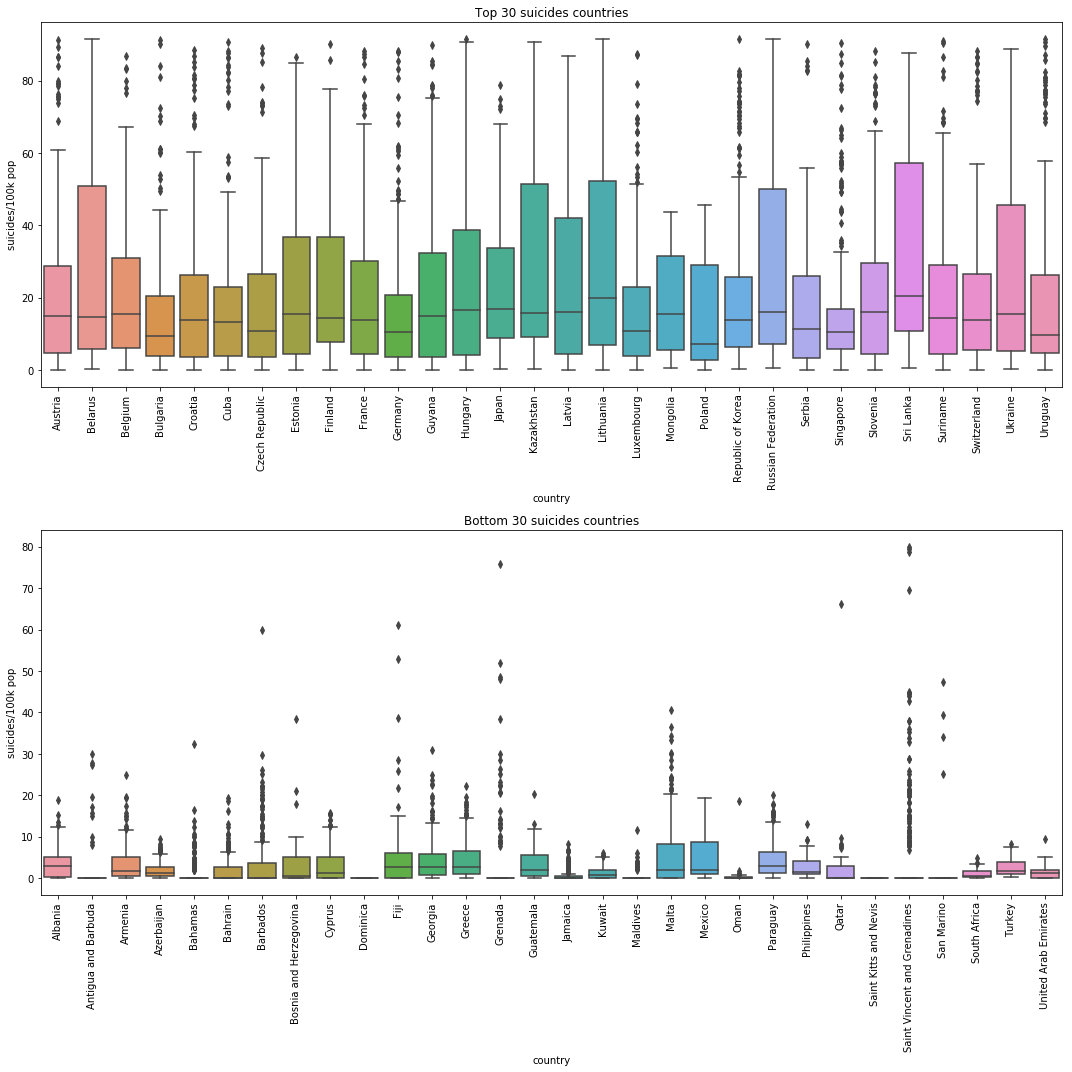

In [11]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.boxplot(x='country', y='suicides/100k pop', 
            data=df.loc[df['country'].isin(top_suicides_countries)], ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title('Top 30 suicides countries')
sns.boxplot(x='country', y='suicides/100k pop', 
            data=df.loc[df['country'].isin(bottom_suicides_countries)], ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title('Bottom 30 suicides countries')
plt.tight_layout()
plt.show()

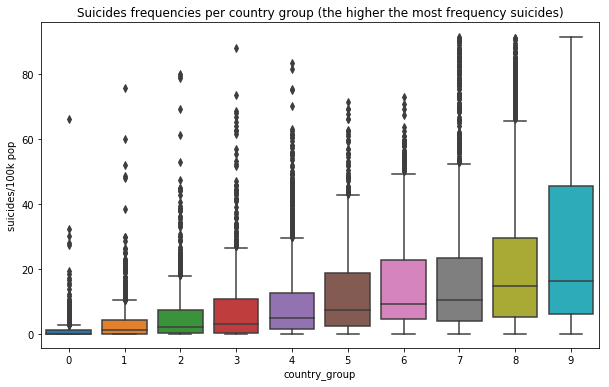

In [12]:
temp = pd.qcut(x=df.groupby(['country']).mean()['suicides/100k pop'].sort_values(ascending=False), 
               q=10, labels=range(10))
df['country_group'] = df['country'].map(temp)
df['country_group'] = pd.to_numeric(df['country_group'])

plt.figure(figsize=(10,6))
sns.boxplot(x=df['country_group'], y=df['suicides/100k pop'])
plt.title("Suicides frequencies per country group (the higher the most frequency suicides)")
plt.show()

In [13]:
CATEGORICALS.append('country_group')
TO_DELETE.append('country')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


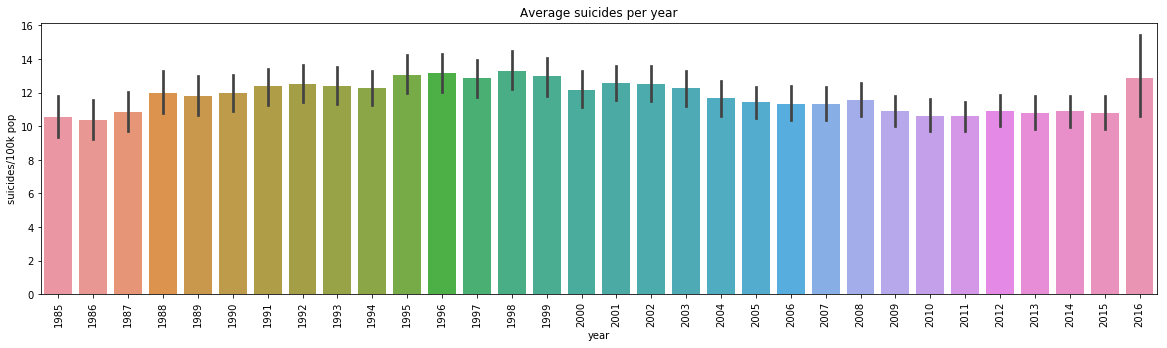

In [14]:
plt.figure(figsize=(20, 5))
sns.barplot(df['year'], df['suicides/100k pop'])
plt.title("Average suicides per year")
plt.xticks(rotation=90)
plt.show()

In [15]:
df = df.loc[df['year']!=2016]

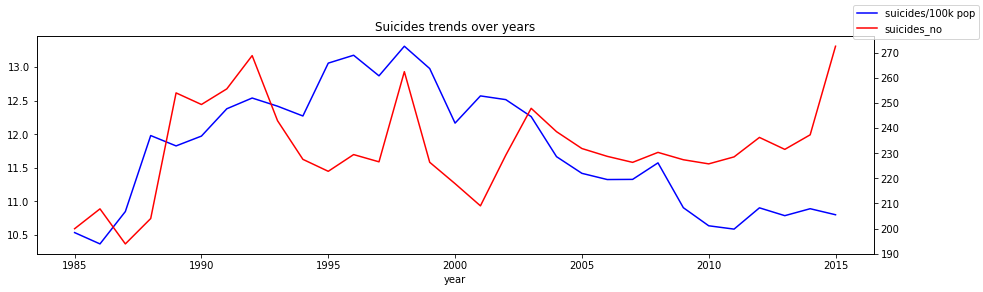

In [16]:
temp = df.groupby(['year']).mean()[['suicides/100k pop','suicides_no']]

fig, ax1 = plt.subplots(figsize=(15,4))
temp['suicides/100k pop'].plot(c='b', ax=ax1)
ax2 = ax1.twinx()
temp['suicides_no'].plot(c='r', ax=ax2)
ax1.figure.legend()
ax1.set_title("Suicides trends over years")
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


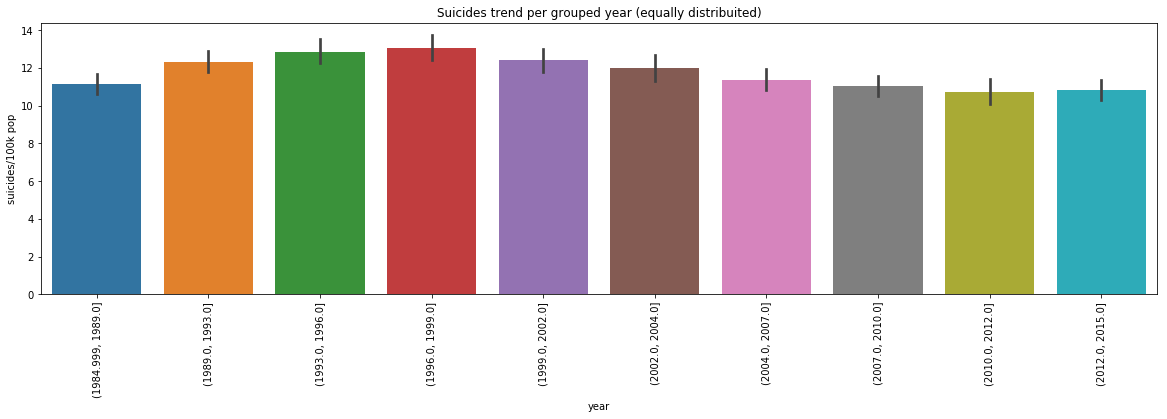

In [17]:
plt.figure(figsize=(20, 5))
sns.barplot(pd.Series(pd.qcut(df['year'],10), name='year'), df['suicides/100k pop'])
plt.title("Suicides trend per grouped year (equally distribuited)")
plt.xticks(rotation=90)
plt.show()

In [18]:
df['year_range'] = pd.qcut(df['year'],10)

In [19]:
CATEGORICALS.append('year_range')
TO_DELETE.append('year')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


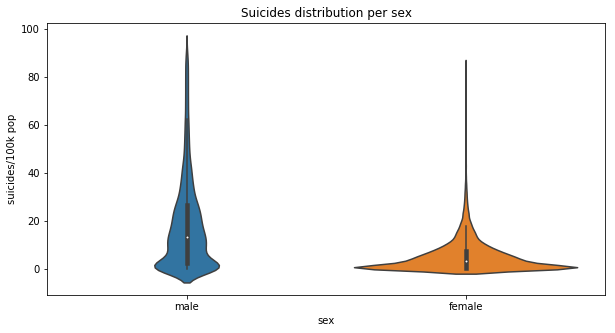

In [20]:
plt.figure(figsize=(10,5))
sns.violinplot(x='sex', y='suicides/100k pop', data=df)
plt.title("Suicides distribution per sex")
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


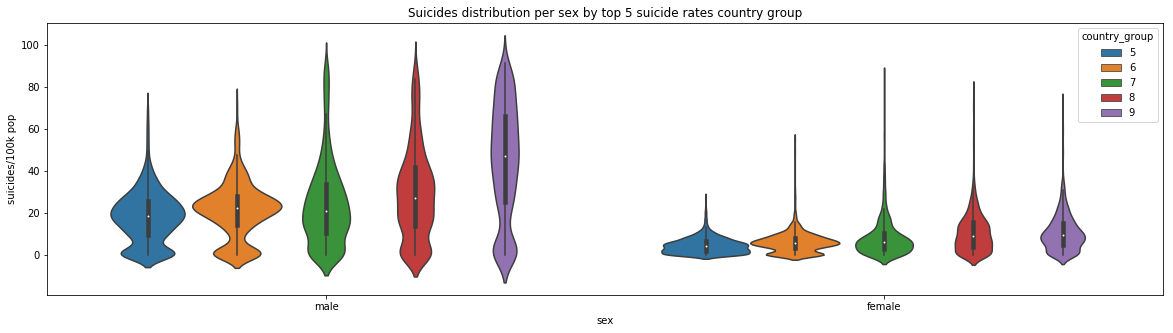

In [21]:
plt.figure(figsize=(20,5))
sns.violinplot(x='sex', y='suicides/100k pop', hue='country_group', data=df[df['country_group']>=5])
plt.title("Suicides distribution per sex by top 5 suicide rates country group")
plt.show()

In [22]:
CATEGORICALS.append('sex')

Age number of unique values: 6
15-24 years    4610
5-14 years     4610
25-34 years    4609
55-74 years    4578
35-54 years    4572
75+ years      4403
Name: age, dtype: int64


suicides_no             suicides/100k pop           
                    sum        mean               sum       mean
age                                                             
15-24 years      807347  175.129501          41292.61   8.957182
25-34 years     1111532  241.165546          56145.42  12.181692
35-54 years     2240793  490.112205          64796.90  14.172550
5-14 years        52264   11.337093           2858.39   0.620041
55-74 years     1560912  340.959371          71207.45  15.554270
75+ years        586775  133.267091          86488.79  19.643150

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


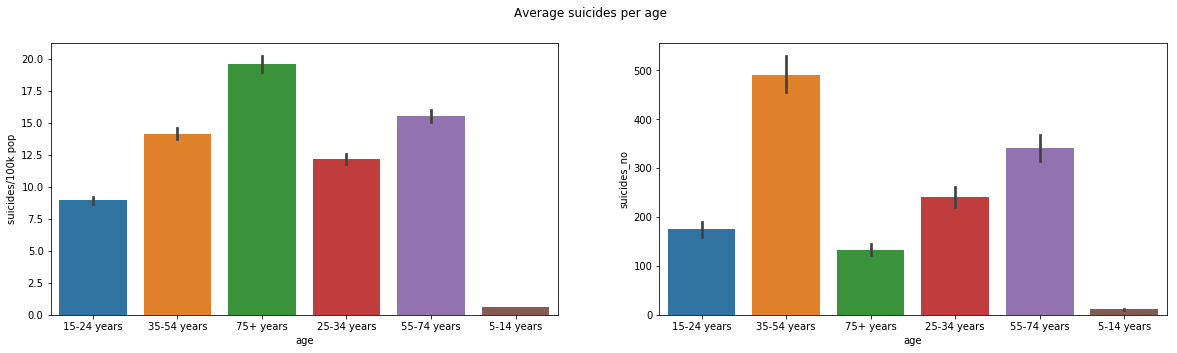

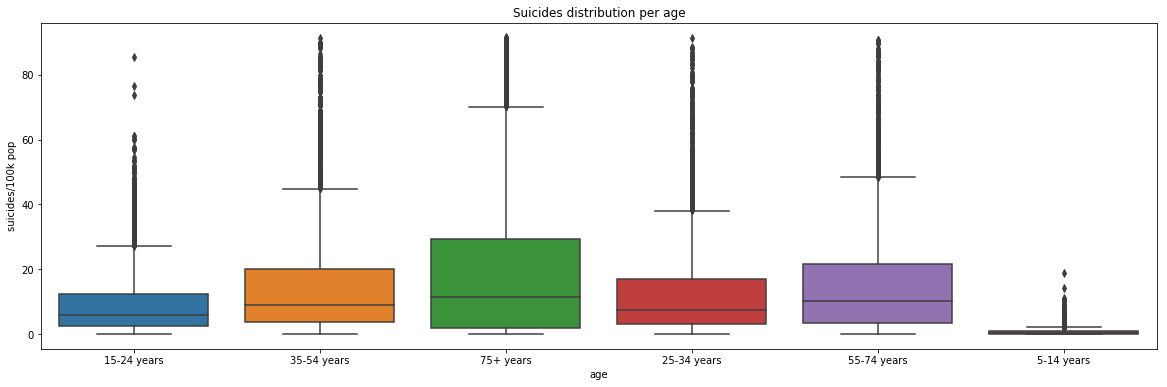

In [23]:
print(f"Age number of unique values: {df['age'].nunique()}")
print(df['age'].value_counts())

display(df.groupby(['age']).agg(['sum','mean'])[['suicides_no','suicides/100k pop']])

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(df['age'], df['suicides/100k pop'], orient='v', ax=ax[0])
sns.barplot(df['age'], df['suicides_no'], orient='v', ax=ax[1])
fig.suptitle("Average suicides per age")
plt.show()

plt.figure(figsize=(20,6))
sns.boxplot(df['age'], df['suicides/100k pop'])
plt.title("Suicides distribution per age")
plt.show()

In [24]:
CATEGORICALS.append('age')

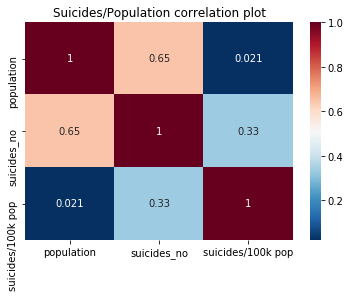

In [25]:
plt.figure()
sns.heatmap(df[['population','suicides_no','suicides/100k pop']].corr(), annot=True, cmap='RdBu_r')
plt.title("Suicides/Population correlation plot")
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


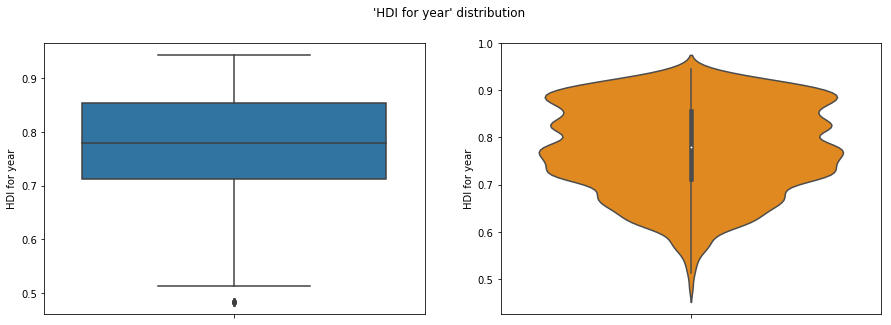

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(df['HDI for year'], orient='v', ax=ax[0])
sns.violinplot(df['HDI for year'], orient='v', color='darkorange', ax=ax[1])
fig.suptitle("'HDI for year' distribution")
plt.show()

In [27]:
df['HDI for year'].fillna((df['HDI for year'].mean()), inplace=True)

In [28]:
df[' gdp_for_year ($) '] = pd.to_numeric(df[' gdp_for_year ($) '].str.replace(',',''))

In [29]:
CONTINUOUS.append(' gdp_for_year ($) ')

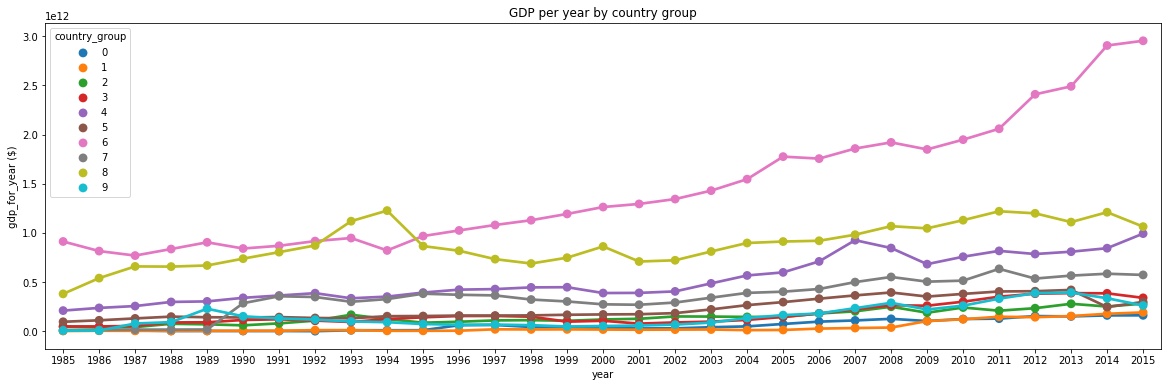

In [30]:
plt.figure(figsize=(20,6))
sns.pointplot(x='year', y=' gdp_for_year ($) ', hue='country_group', 
              data=df.groupby(['country_group','year']).mean().reset_index())
plt.title('GDP per year by country group')
plt.show()

In [31]:
df[' gdp_for_year ($) '].isnull().any()

False

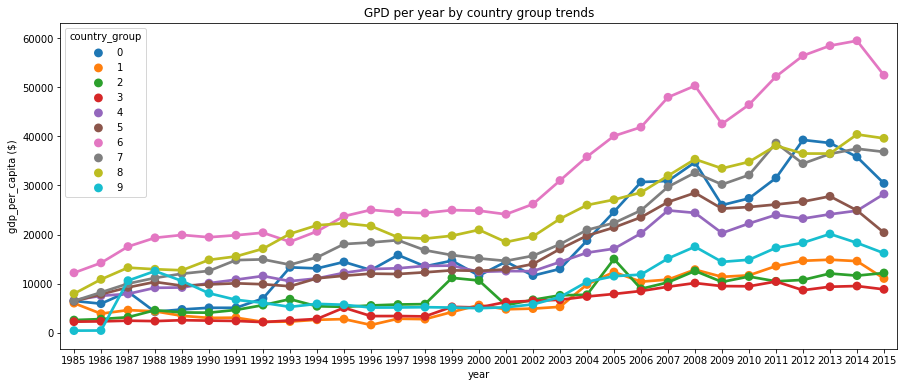

In [32]:
plt.figure(figsize=(15,6))
sns.pointplot(x='year', y='gdp_per_capita ($)', hue='country_group', 
              data=df.groupby(['country_group','year']).mean().reset_index())
plt.title("GPD per year by country group trends")
plt.show()

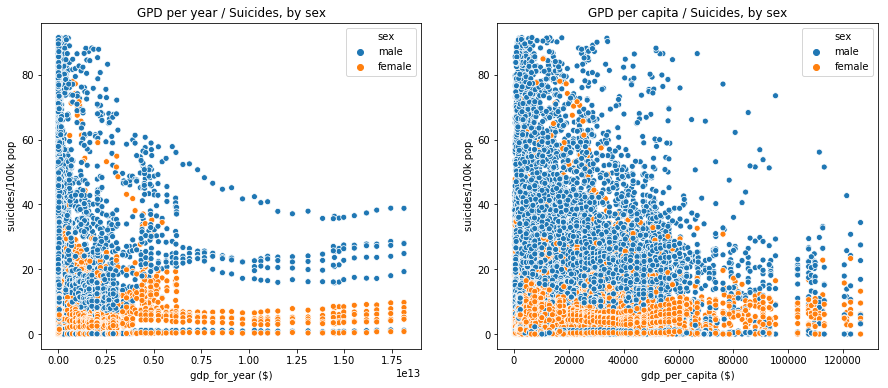

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(df[' gdp_for_year ($) '], df['suicides/100k pop'], hue=df['sex'], ax=ax[0])
ax[0].set_title("GPD per year / Suicides, by sex")
sns.scatterplot(df['gdp_per_capita ($)'], df['suicides/100k pop'], hue=df['sex'], ax=ax[1])
ax[1].set_title("GPD per capita / Suicides, by sex")
plt.show()

Generation number of unique values: 6
Generation X       6375
Silent             6228
Millenials         5780
Boomers            4921
G.I. Generation    2608
Generation Z       1470
Name: generation, dtype: int64


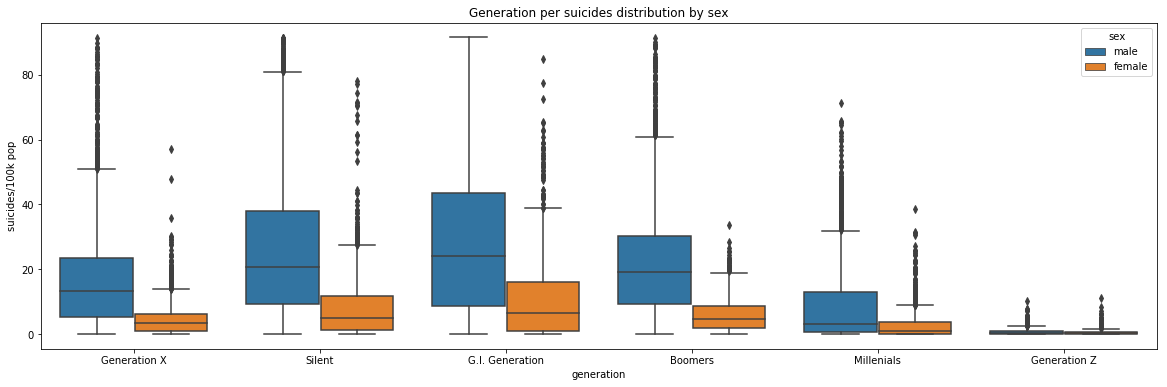

In [34]:
print(f"Generation number of unique values: {df['generation'].nunique()}")
print(df['generation'].value_counts())

plt.figure(figsize=(20,6))
sns.boxplot(df['generation'], df['suicides/100k pop'], hue=df['sex'])
plt.title("Generation per suicides distribution by sex")
plt.show()

In [35]:
CATEGORICALS.append('generation')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


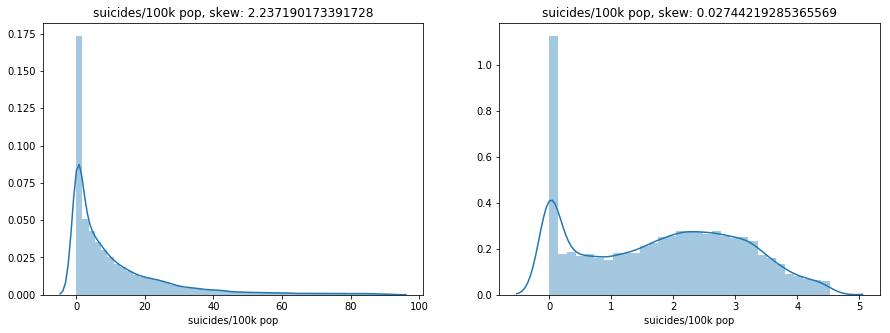

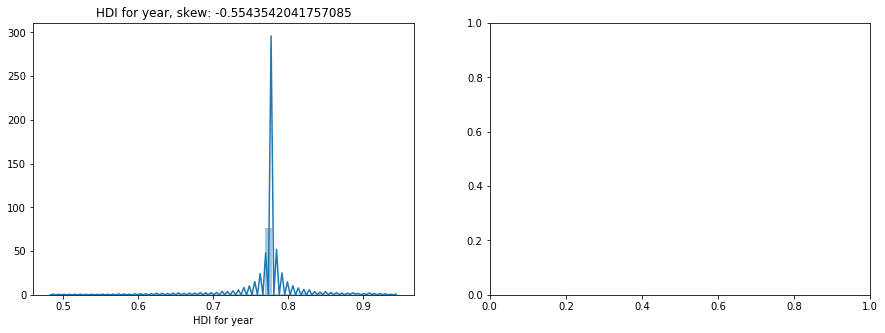

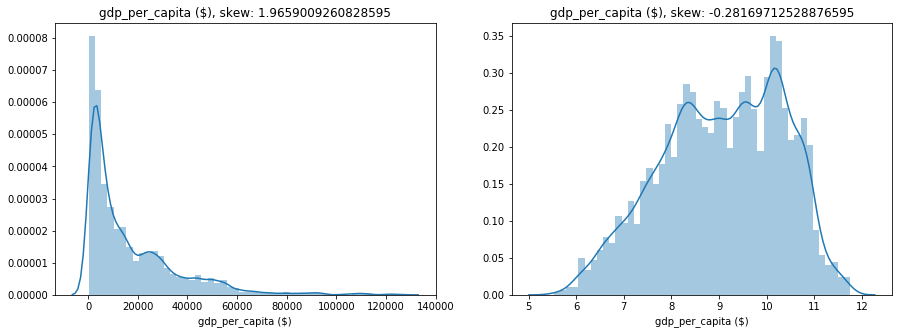

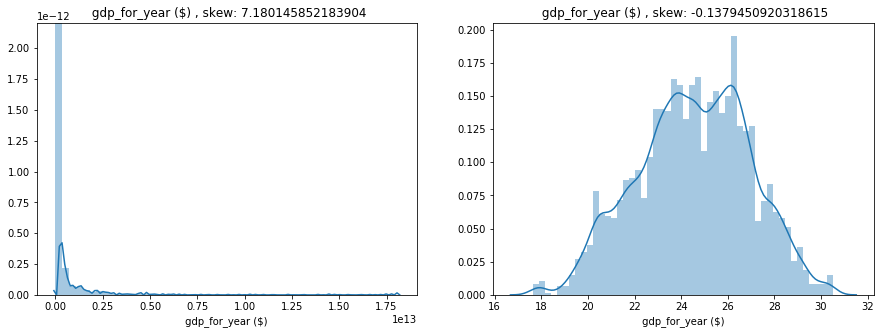

In [36]:
from scipy.stats import skew

for c in CONTINUOUS:
    skew_value = skew(df[c].dropna())
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.distplot(df[c], ax=ax[0])
    ax[0].set_title(f'{c}, skew: {skew_value}')
    if abs(skew_value) >= 0.6:
        new_skew_value = skew(np.log1p(df[c]).dropna())
        new_serie = np.log1p(df[c])
        sns.distplot(new_serie, ax=ax[1])
        ax[1].set_title(f'{c}, skew: {new_skew_value}')
        df[c] = new_serie
    plt.show()

In [37]:
TO_DELETE.append('suicides_no')

In [38]:
TO_DELETE.append('country-year')

In [39]:
print("COLUMNS: ", list(df.columns))
print("CATEGORICALS: ", CATEGORICALS)
print("CONTINUOUS: ", CONTINUOUS)
print("TO_DELETE: ", TO_DELETE)

COLUMNS:  ['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation', 'country_group', 'year_range']
CATEGORICALS:  ['country_group', 'year_range', 'sex', 'age', 'generation']
CONTINUOUS:  ['suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)', ' gdp_for_year ($) ']
TO_DELETE:  ['country', 'year', 'suicides_no', 'country-year']


In [40]:
df.drop(TO_DELETE,1,inplace=True)

In [41]:
OBJECTIVE = ['suicides/100k pop']

In [42]:
dataset = df.merge(pd.get_dummies(df[CATEGORICALS], drop_first=True, columns=CATEGORICALS), 
                   left_index=True, right_index=True, how='inner').drop(CATEGORICALS,1)

print(dataset.shape)

dataset.head()

(27382, 34)


,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),country_group_1,country_group_2,country_group_3,country_group_4,country_group_5,country_group_6,country_group_7,country_group_8,country_group_9,"year_range_(1989.0, 1993.0]","year_range_(1993.0, 1996.0]","year_range_(1996.0, 1999.0]","year_range_(1999.0, 2002.0]","year_range_(2002.0, 2004.0]","year_range_(2004.0, 2007.0]","year_range_(2007.0, 2010.0]","year_range_(2010.0, 2012.0]","year_range_(2012.0, 2015.0]",sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,312900,2.042518,0.776807,21.49181,6.680855,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,308000,1.822935,0.776807,21.49181,6.680855,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2,289700,1.763017,0.776807,21.49181,6.680855,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,21800,1.720979,0.776807,21.49181,6.680855,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
4,274300,1.453953,0.776807,21.49181,6.680855,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


### Some ML

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error

In [44]:
X = dataset.drop(OBJECTIVE,1).values
y = dataset[OBJECTIVE].values.ravel()

X.shape, y.shape

((27382, 33), (27382,))

In [45]:
cv = KFold(n_splits=5, shuffle=True, random_state=33)
scaler = MinMaxScaler(feature_range=(0,1))
model = RandomForestRegressor(n_jobs=4, random_state=33, n_estimators=100)

In [46]:
predictions = pd.DataFrame(columns=['true','train','test'], index=dataset.index)
predictions['true'] = np.expm1(y)
for i, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    print(f"Cross-Validation iteration: {i+1}")
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    
    predictions.iloc[train_idx, 1] = np.maximum(np.expm1(model.predict(X_train)), 0)
    predictions.iloc[test_idx, 2] = np.maximum(np.expm1(model.predict(X_test)), 0)

predictions = predictions.astype(np.float32)

Cross-Validation iteration: 1
Cross-Validation iteration: 2
Cross-Validation iteration: 3
Cross-Validation iteration: 4
Cross-Validation iteration: 5


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


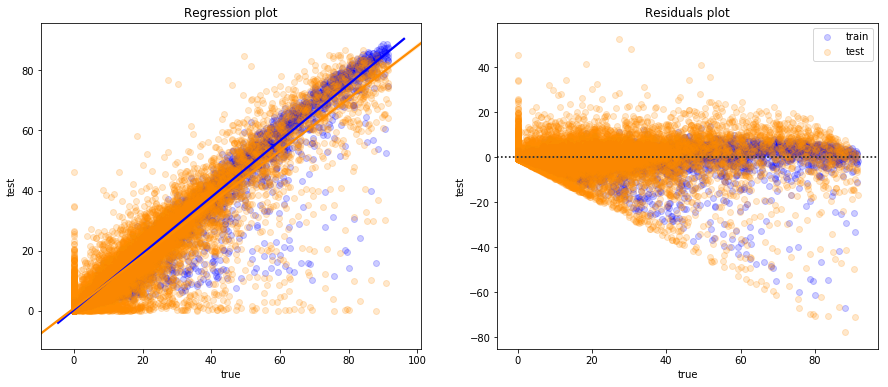

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.regplot(x=predictions['true'], y=predictions['train'], color='b', scatter_kws={'alpha':0.2}, label='train', ax=ax[0])
sns.regplot(x=predictions['true'], y=predictions['test'], color='darkorange', scatter_kws={'alpha':0.2}, label='test', ax=ax[0])
ax[0].set_title("Regression plot")
sns.residplot(x=predictions['true'], y=predictions['train'], color='b', scatter_kws={'alpha':0.2}, label='train', ax=ax[1])
sns.residplot(x=predictions['true'], y=predictions['test'], color='darkorange', scatter_kws={'alpha':0.2}, label='test', ax=ax[1])
ax[1].set_title("Residuals plot")
plt.legend()
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


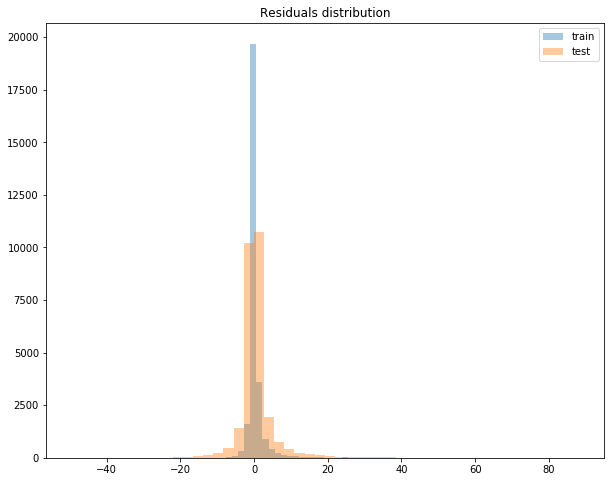

In [48]:
plt.figure(figsize=(10,8))
sns.distplot(predictions['true']-predictions['train'], kde=False, label='train')
sns.distplot(predictions['true']-predictions['test'], kde=False, label='test')
plt.title("Residuals distribution")
plt.legend()
plt.show()

In [49]:
print(f'r2_score train: {r2_score(predictions["true"], predictions["train"]):.2f}')
print(f'r2_score test: {r2_score(predictions["true"], predictions["test"]):.2f}')
print(f'rmse train: {np.sqrt(mean_squared_error(predictions["true"], predictions["train"])):.2f}')
print(f'rmse test: {np.sqrt(mean_squared_error(predictions["true"], predictions["test"])):.2f}')

r2_score train: 0.97
r2_score test: 0.88
rmse train: 2.92
rmse test: 5.52
